In [ ]:
# !pip install pandocfilters
# !pip install lux-api==0.2.3
# !pip install lux

In [2]:
import os
# import lux
import pandas as pd

In [3]:
dataset_path = "dataset"
datasets = {}
for d_file in os.listdir(dataset_path):
    try:
        datasets[d_file] = pd.read_sas(os.path.join(dataset_path, d_file))
    except:
        pass

In [4]:
list(datasets.keys())

['ess6e02_4.sas7bdat']

In [5]:
dataset = datasets["ess6e02_4.sas7bdat"]

In [6]:
dataset.head()

,name,essround,edition,proddate,idno,cntry,tvtot,tvpol,ppltrst,pplfair,...,inwtm,spltadme,supqad1,supqad2,supqdd,supqmm,supqyr,dweight,pspwght,pweight
0,b'ESS6e02_4',6.0,b'2.4',b'01.12.2018',1.0,b'AL',7.0,6.0,5.0,3.0,...,103.0,1.0,6.0,1.0,19.0,12.0,2012.0,0.775069,0.536221,0.186008
1,b'ESS6e02_4',6.0,b'2.4',b'01.12.2018',2.0,b'AL',7.0,2.0,0.0,88.0,...,75.0,1.0,6.0,1.0,19.0,12.0,2012.0,1.354429,0.659520,0.186008
2,b'ESS6e02_4',6.0,b'2.4',b'01.12.2018',3.0,b'AL',4.0,0.0,5.0,5.0,...,57.0,1.0,6.0,1.0,19.0,12.0,2012.0,2.933552,1.815610,0.186008
3,b'ESS6e02_4',6.0,b'2.4',b'01.12.2018',4.0,b'AL',0.0,66.0,10.0,5.0,...,86.0,1.0,6.0,1.0,19.0,12.0,2012.0,0.968836,0.534046,0.186008
4,b'ESS6e02_4',6.0,b'2.4',b'01.12.2018',5.0,b'AL',6.0,2.0,5.0,6.0,...,69.0,1.0,6.0,1.0,19.0,12.0,2012.0,1.325001,1.880963,0.186008


In [7]:
dataset.shape

(54673, 624)

In [8]:
pct_null_cols = dataset.isna().sum().sort_values() / dataset.shape[0]
dataset_cleaned = dataset[pct_null_cols[pct_null_cols==0].index]
dataset_cleaned.cntry = dataset_cleaned.cntry.str.decode('utf-8')
dataset_cleaned.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(54673, 321)

In [9]:
list(dataset_cleaned.columns)

['name',
 'yrbrn6',
 'yrbrn5',
 'yrbrn4',
 'yrbrn3',
 'yrbrn2',
 'yrbrn',
 'agea',
 'gndr7',
 'gndr6',
 'gndr5',
 'yrbrn7',
 'gndr4',
 'gndr2',
 'gndr',
 'hhmmb',
 'gvcodmc',
 'gvcodmi',
 'gvspdmc',
 'gvspdmi',
 'gvspcdm',
 'stpldmc',
 'stpldmi',
 'gndr3',
 'pspwght',
 'rshipa2',
 'rshipa3',
 'rtrd',
 'dsbld',
 'uempli',
 'uempla',
 'edctn',
 'pdwrk',
 'eduyrs',
 'eisced',
 'edulvlb',
 'domicil',
 'chldhhe',
 'chldhm',
 'maritalb',
 'marsts',
 'iccohbt',
 'icpart2',
 'dvrcdeva',
 'rshpsts',
 'icpart1',
 'rshipa7',
 'rshipa6',
 'rshipa5',
 'rshipa4',
 'chpldmc',
 'chpldmi',
 'chpldm',
 'pplvdmc',
 'rghmgpr',
 'meprinf',
 'medcrgv',
 'oppcrgv',
 'dfprtal',
 'dspplvt',
 'fairelc',
 'physact',
 'plinsoc',
 'prhlppl',
 'rehlppl',
 'sedirlf',
 'tnapsur',
 'tmendng',
 'tmabdng',
 'tmimdng',
 'deaimpp',
 'flapppl',
 'tmdotwa',
 'flclpla',
 'lfwrs',
 'lotsgot',
 'nhpftr',
 'votedir',
 'cmsrv',
 'imvtctz',
 'ctstogv',
 'pplvdmi',
 'fplvdmc',
 'fplvdmi',
 'fplvdm',
 'pltaviec',
 'grdfincc',
 'gve

In [25]:
interesting_cols = ["cntry",
                   "tvtot", # TV watching, total time on average weekday
                   "tvpol", # TV watching, news/politics/current affairs on average weekday
                   "ppltrst", # Most people can be trusted or you can't be too careful,
                   "trstprl", # Trust in country's parliament
                   "trstlgl", # Trust in the legal system
                   "gndr",
                   "agea",
                   "stfjb"
                   ]

target_cols = ["happy"]


In [26]:
result_dataset = dataset_cleaned[interesting_cols + target_cols]

In [27]:
import matplotlib.pyplot as plt


In [28]:
grouped = result_dataset.groupby("cntry")

In [29]:
# for group in grouped:
#     plt.figure()
#     print(group[0])
#     plt.hist(group[1].happy)
#     plt.show()

In [30]:
features_by_country = grouped.mean()

In [31]:
features_by_country

,tvtot,tvpol,ppltrst,trstprl,trstlgl,gndr,agea,stfjb,happy
cntry,,,,,,,,,
AL,4.579517,3.945878,3.297252,5.248127,4.838468,1.542881,58.089092,49.835970,6.614488
BE,4.117710,4.266988,5.096308,5.640984,5.144997,1.512574,47.327983,36.288925,7.689139
BG,5.923894,5.206195,4.003982,5.345133,7.640708,1.576106,54.029646,41.462832,6.455310
CH,3.215003,6.685867,5.683858,10.906899,9.021433,1.500335,47.408573,29.902880,8.296718
CY,4.894265,3.241935,3.717742,7.100358,7.439068,1.559140,50.112903,38.338710,7.919355
CZ,6.532106,3.997511,5.302140,5.197113,6.078148,1.506222,61.014435,36.832255,8.630662
DE,4.017579,4.737323,4.931711,5.921907,6.798513,1.495943,50.945909,34.295470,7.705206
DK,4.263636,4.156364,7.271515,7.363030,9.159394,1.494545,48.700606,38.906667,8.630909
EE,4.425210,5.159664,5.856303,5.459244,7.837395,1.579832,49.406723,35.140336,7.193277


<BarContainer object of 29 artists>

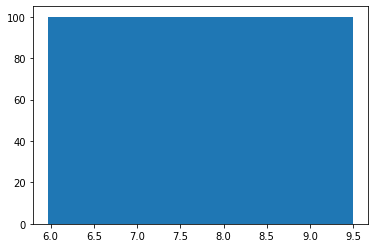

In [32]:
plt.bar(features_by_country.happy, height=100)

<AxesSubplot:xlabel='cntry'>

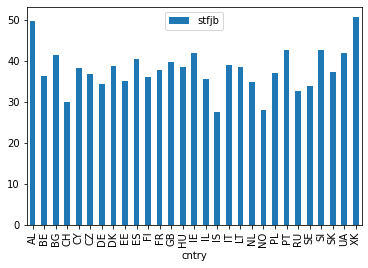

In [34]:
#                    "gndr",
#                    "agea"
# ppltrst
features_by_country.plot.bar(y=['stfjb'])

In [22]:
dataset_cleaned.group.gndr.value_counts()

2.0    29727
1.0    24929
9.0       17
Name: gndr, dtype: int64